<a href="https://colab.research.google.com/github/Chutki319239/msazure/blob/main/Tree_Species_Classification_%5BEDUNET_SHELL_INTERNSHIP%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
!ls -l "/content/drive/MyDrive"


total 314588
-rw------- 1 root root   447793 Jul 31  2024 '23MCB0025 (1).pdf'
-rw------- 1 root root   451093 Jul 31  2024 '23MCB0025 (1).pdf.docx'
-rw------- 1 root root   316058 Jul 31  2024 '23MCB0025_COA_TH (1).pdf'
-rw------- 1 root root   316058 Jul 31  2024  23MCB0025_COA_TH.pdf
-rw------- 1 root root   332219 Jul 31  2024 '23MCB0025_LA5 (1).pdf'
-rw------- 1 root root   332219 Jul 31  2024  23MCB0025_LA5.pdf
-rw------- 1 root root   447793 Jul 31  2024  23MCB0025.pdf
-rw------- 1 root root   451093 Jul 31  2024  23MCB0025.pdf.docx
-rw------- 1 root root   387428 Jul 31  2024 '23MCB0025_VUSALA_SRI_SAI_PRAVALLIKA_SET (1).docx'
-rw------- 1 root root   402601 Jul 31  2024 '23MCB0025_VUSALA_SRI_SAI_PRAVALLIKA_SET (1).pdf'
-rw------- 1 root root   387428 Jul 31  2024  23MCB0025_VUSALA_SRI_SAI_PRAVALLIKA_SET.docx
-rw------- 1 root root   402601 Jul 31  2024  23MCB0025_VUSALA_SRI_SAI_PRAVALLIKA_SET.pdf
-rw------- 1 root root   387381 Jul 31  2024 '23MCB0025_VUSALA_SRI_SAI_PRAVALLIKA_S

In [19]:
!mv "/content/drive/MyDrive/archive (1)" "/content/drive/MyDrive/archive1"


In [20]:
!ls -l "/content/drive/MyDrive"


total 314588
-rw------- 1 root root   447793 Jul 31  2024 '23MCB0025 (1).pdf'
-rw------- 1 root root   451093 Jul 31  2024 '23MCB0025 (1).pdf.docx'
-rw------- 1 root root   316058 Jul 31  2024 '23MCB0025_COA_TH (1).pdf'
-rw------- 1 root root   316058 Jul 31  2024  23MCB0025_COA_TH.pdf
-rw------- 1 root root   332219 Jul 31  2024 '23MCB0025_LA5 (1).pdf'
-rw------- 1 root root   332219 Jul 31  2024  23MCB0025_LA5.pdf
-rw------- 1 root root   447793 Jul 31  2024  23MCB0025.pdf
-rw------- 1 root root   451093 Jul 31  2024  23MCB0025.pdf.docx
-rw------- 1 root root   387428 Jul 31  2024 '23MCB0025_VUSALA_SRI_SAI_PRAVALLIKA_SET (1).docx'
-rw------- 1 root root   402601 Jul 31  2024 '23MCB0025_VUSALA_SRI_SAI_PRAVALLIKA_SET (1).pdf'
-rw------- 1 root root   387428 Jul 31  2024  23MCB0025_VUSALA_SRI_SAI_PRAVALLIKA_SET.docx
-rw------- 1 root root   402601 Jul 31  2024  23MCB0025_VUSALA_SRI_SAI_PRAVALLIKA_SET.pdf
-rw------- 1 root root   387381 Jul 31  2024 '23MCB0025_VUSALA_SRI_SAI_PRAVALLIKA_S

In [21]:
import os

data_path = "/content/drive/MyDrive/archive1"

for root, dirs, files in os.walk(data_path):
    print("📁", root)
    print("📂", dirs)
    print("📄", files[:5])
    print("-" * 40)


📁 /content/drive/MyDrive/archive1
📂 ['Tree_Species_Dataset']
📄 []
----------------------------------------
📁 /content/drive/MyDrive/archive1/Tree_Species_Dataset
📂 ['mango', 'khajur', 'motichanoti', 'gunda', 'kesudo', 'kanchan', 'jamun', 'nilgiri', 'gulmohor', 'neem', 'shirish', 'pipal', 'simlo', 'sonmahor', 'pilikaren', 'sitafal', 'saptaparni', 'other', 'vad', 'sugarcane', 'bili', 'garmalo', 'coconut', 'babul', 'banyan', 'bamboo', 'champa', 'asopalav', 'cactus', 'amla', '.git']
📄 []
----------------------------------------
📁 /content/drive/MyDrive/archive1/Tree_Species_Dataset/mango
📂 []
📄 ['10.jpg', '11.jpg', '12.jpg', '1.jpg', '21.jpg']
----------------------------------------
📁 /content/drive/MyDrive/archive1/Tree_Species_Dataset/khajur
📂 []
📄 ['download (1).jpg', 'download (2).jpeg', 'download (1).jpeg', 'download (6).jpeg', 'images (10).jpeg']
----------------------------------------
📁 /content/drive/MyDrive/archive1/Tree_Species_Dataset/motichanoti
📂 []
📄 ['download (4).jpeg', '

In [22]:
!pip install split-folders
import splitfolders

# Set source and destination paths
source_dir = "/content/drive/MyDrive/archive1/Tree_Species_Dataset"
output_dir = "/content/tree_dataset_split"

# Split into train:val:test = 70:20:10
splitfolders.ratio(source_dir, output=output_dir, seed=42, ratio=(.7, .2, .1))


Copying files: 1105 files [03:27,  5.33 files/s]


In [23]:
train_dir = "/content/tree_dataset_split/train"
val_dir = "/content/tree_dataset_split/val"
test_dir = "/content/tree_dataset_split/test"


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 150
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 772 images belonging to 31 classes.
Found 219 images belonging to 31 classes.
Found 114 images belonging to 31 classes.


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.0579 - loss: 3.7280 - val_accuracy: 0.1735 - val_loss: 3.0895
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.1684 - loss: 3.0300 - val_accuracy: 0.2055 - val_loss: 2.7070
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.2192 - loss: 2.7146 - val_accuracy: 0.3242 - val_loss: 2.4529
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.2802 - loss: 2.4578 - val_accuracy: 0.3242 - val_loss: 2.2662
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.3717 - loss: 2.1612 - val_accuracy: 0.3790 - val_loss: 2.1971
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.4722 - loss: 1.7475 - val_accuracy: 0.4521 - val_loss: 1.9628
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.6164 - loss: 1.2724 - val_accuracy: 0.4110 - val_loss: 1.9450
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.7008 - loss: 0.9571 - val_accuracy: 0.4338 - val_loss:

In [27]:
loss, accuracy = model.evaluate(test_generator)
print(f"✅ Test Accuracy: {accuracy * 100:.2f}%")


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 239ms/step - accuracy: 0.4244 - loss: 2.2151
✅ Test Accuracy: 43.86%


In [34]:
model.save("/content/tree_species_model.keras")  # Recommended format


In [35]:
from google.colab import files
files.download("/content/tree_species_model.keras")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
!ls /content


drive  sample_data  tree_dataset_split


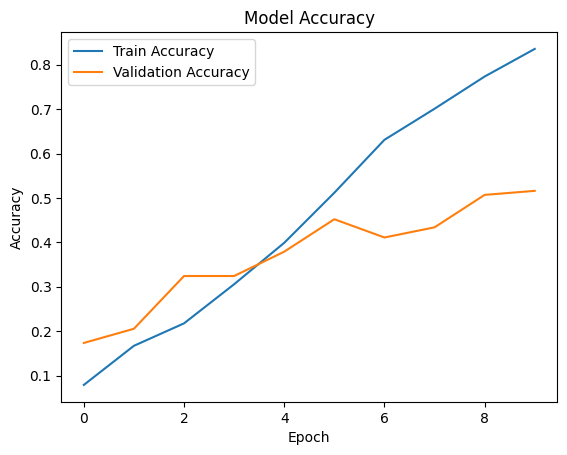

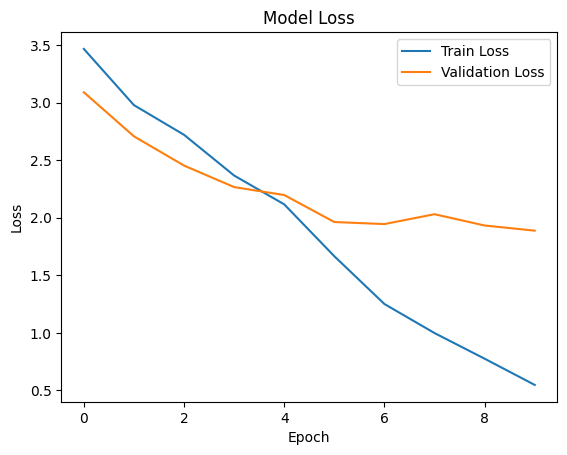

In [29]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
